In [1]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from numpy import dot
from numpy.linalg import norm

# Feature 추출 함수 정의

In [34]:
class FeatureExtractor:
  def __init__(self):
    base_model = InceptionV3(weights='imagenet')
    # Customize the model to return features from fully-connected layer
    self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('predictions').output) 
    # InceptionV3 : ['batch_normalization_93', 'activation_85', 'mixed9_1', 'concatenate_1', 'activation_93', 'mixed10', 'avg_pool', 'predictions'].

  def extract(self, img):
  # Resize the image
    img = img.resize((299,299)) 
    # Convert the image color space
    img = img.convert('RGB')
    # Reformat the image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    # Extract Features
    feature = self.model.predict(x)[0]
    return feature / np.linalg.norm(feature)
  

In [3]:
# input_shape = (ROWS, COLS, 3)
# nclass = len(train_gen.class_indices)

# base_model = applications.InceptionV3(weights='imagenet', 
#                                 include_top=False, 
#                                 input_shape=(ROWS, COLS,3))

# Feature 추출
쇼핑몰 이미지에서 특징 추출하기



In [4]:
path = r"C:\Users\NT550009\Desktop\detail_image_aggregated"

os.chdir(path)
files = os.listdir(path)
print(len(files)) # 88965

88965


In [5]:
features = []
img_paths = []

fe = FeatureExtractor()
# Save Image Feature Vector with Database Images

# 알고 싶은 이미지 설정 및 비교

In [18]:
# 폴더에 저장되어 있는 features npy 가져오기
features_dir = r"C:\Users\NT550009\Desktop\features"
os.chdir(features_dir)
feature_list = os.listdir(features_dir)
# print(feature_list) ['2856205_3.npy', '2856205_4.npy', '2856205_5.npy', '2856205_6.npy', '2856206_0.npy', '2856206_1.npy',

# 각 파일을 읽어서 features에 추가합니다.
for file_path in feature_list:
    data = np.load(file_path)
    features.append(data)

In [19]:
print(feature_list)

['2755663_5.npy', '2755663_6.npy', '2755663_7.npy', '2755790_0.npy', '2755840_0.npy', '2755840_1.npy', '2755840_10.npy', '2755840_11.npy', '2755840_12.npy', '2755840_13.npy', '2755840_14.npy', '2755840_2.npy', '2755840_3.npy', '2755840_4.npy', '2755840_5.npy', '2755840_6.npy', '2755840_7.npy', '2755840_8.npy', '2755840_9.npy', '2755843_0.npy', '2755843_1.npy', '2755843_10.npy', '2755843_11.npy', '2755843_12.npy', '2755843_13.npy', '2755843_2.npy', '2755843_3.npy', '2755843_4.npy', '2755843_5.npy', '2755843_6.npy', '2755843_7.npy', '2755843_8.npy', '2755843_9.npy', '2755918_0.npy', '2755983_0.npy', '2755983_1.npy', '2755986_0.npy', '2755986_1.npy', '2756280_0.npy', '2756280_1.npy', '2756280_10.npy', '2756280_2.npy', '2756280_3.npy', '2756280_4.npy', '2756280_5.npy', '2756280_6.npy', '2756280_7.npy', '2756280_8.npy', '2756280_9.npy', '2756281_0.npy', '2756281_1.npy', '2756281_10.npy', '2756281_2.npy', '2756281_3.npy', '2756281_4.npy', '2756281_5.npy', '2756281_6.npy', '2756281_7.npy', '2

In [12]:
path = r"C:\Users\NT550009\Desktop\detail_image_aggregated"
os.chdir(path)
files = os.listdir(path)
files.reverse()
img_paths = []  # 이미지 파일 경로를 저장할 리스트 [C:\\Users\\NT550009\\Desktop\\detail_image_aggregated\\999580_6.jpg', ]

for i, file in enumerate(files):
    image_path = os.path.join(path, file)  # 파일 속 이미지 파일 경로
    img_paths.append(image_path)

In [13]:
# Insert the image query
img = Image.open(r"C:\Users\NT550009\Desktop\recommendation\cropped_image_2.jpg") # 알고 싶은 이미지 경로
# query 에서 feature 추출
query = fe.extract(img) 

1/1 [==============================] - 0s 180ms/step


# L2 거리

In [30]:
# Calculate the similarity (distance) between images # 유사도 비교
dists = np.linalg.norm(features - query, axis=1) 

# Extract 30 images that have lowest distance 
# 가장 가까운 30개의 사진 추천
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id], id) for id in ids]

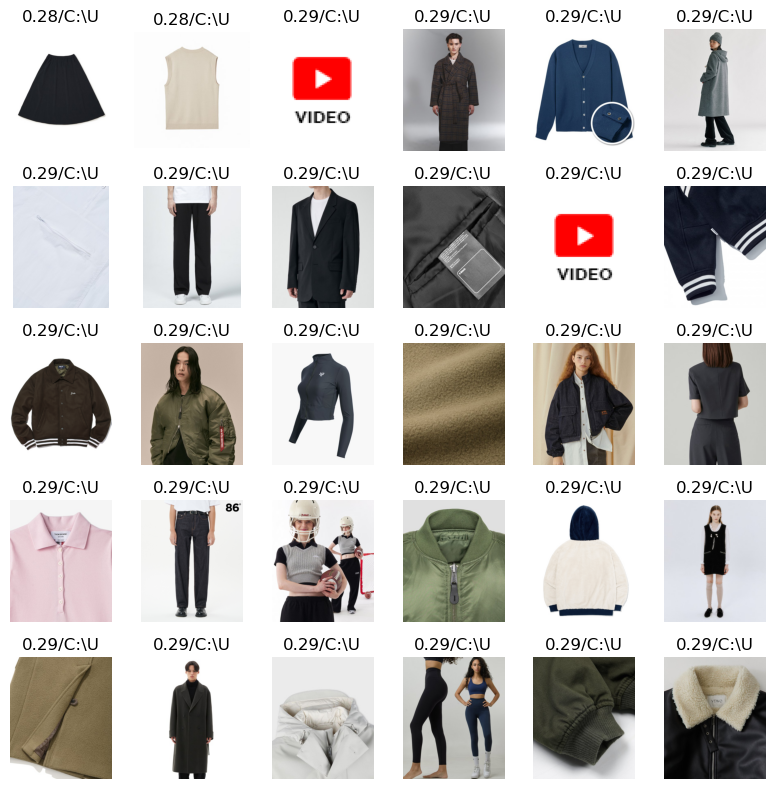

In [35]:
# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8)) # figsize 설정
for a in range(5*6): # 30개의 서브플롯
    score = scores[a] # 거리유사도가 낮은 순서대로 
    axes.append(fig.add_subplot(5, 6, a+1)) # 채워진 서브플롯 위치 저장
    subplot_title=str(round(score[0],2)) + "/" + score[1].split('/')[-1][:4] # 서브플롯 제목 : 유사도/m이미지번호
    axes[-1].set_title(subplot_title) 
    plt.axis('off') # 현재 서브플롯의 축에 대한 눈금과 레이블을 제거
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()

# 코사인 유사도

In [16]:
import numpy as np
from sklearn.metrics.pairwise import cosine_distances

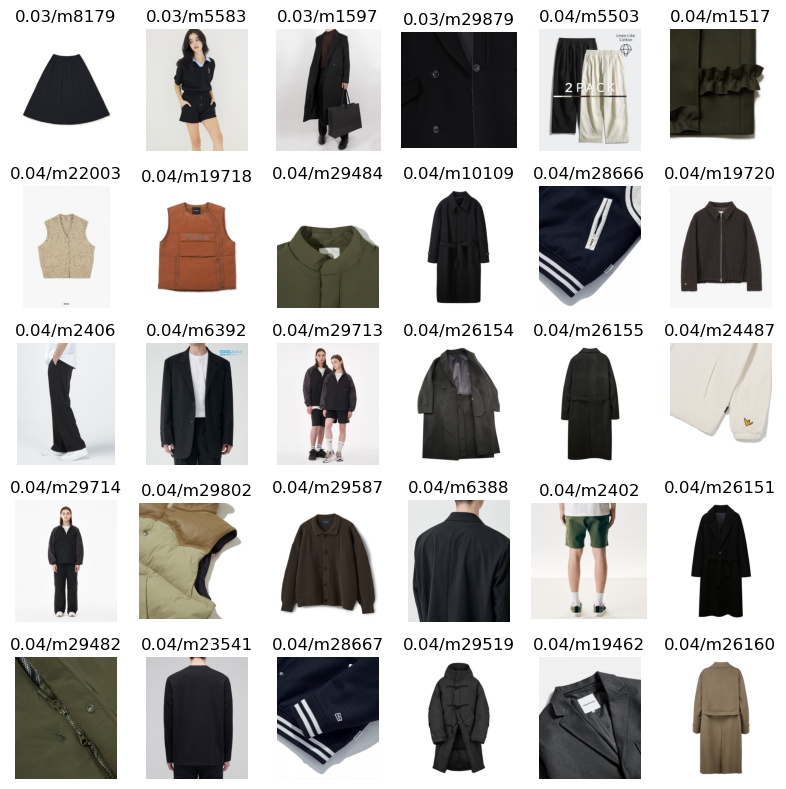

In [17]:
# cosine similarity
dists = cosine_distances(features, query.reshape(1, -1)).ravel()
# dists = np.linalg.norm(features - query, axis=1) 

# Extract 30 images that have lowest distance 
# 가장 가까운 30개의 사진 추천
ids = np.argsort(dists)[:30]
 
scores = [(dists[id], img_paths[id], id) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/m" + str(score[2]+1)
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()



# 보스톤 거리

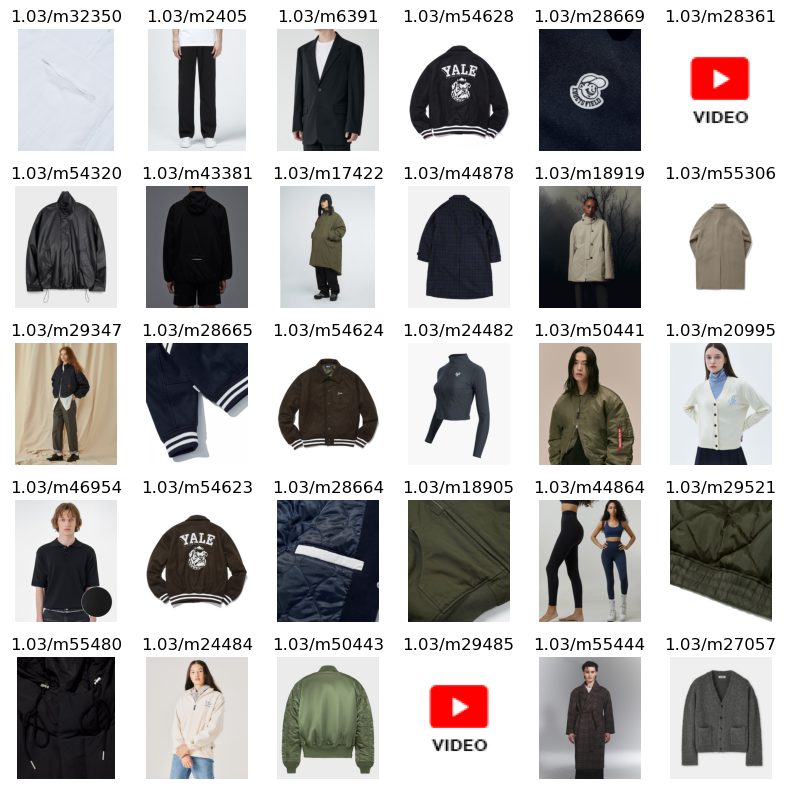

In [21]:
# boston
distance = np.sum(np.abs(features - query))


dists = cosine_distances(features, query.reshape(1, -1)).ravel()

dists = np.sum(np.abs(features - query), axis=1)

# Extract 30 images that have lowest distance 
# 가장 가까운 30개의 사진 추천
ids = np.argsort(dists)[:30]


scores = [(dists[id], img_paths[id], id) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(round(score[0],2)) + "/m" + str(score[2]+1)
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()